**PEC3_ IDENTIFICACION Y CLASIFICACION DE VEHICULOS COMO BICICLETAS, CARROS, CAMIONES, AMBULANCIAS, MOTOCICLETAS A PARTIR DE IMAGENES:.**

# **IMPORT**

Este conjunto de librerías y herramientas permite construir, entrenar, y evaluar modelos de visión por computadora, especialmente para tareas de detección y segmentación de objetos. Las bibliotecas principales incluyen YOLOv8 (de ultralytics), especializada en detección rápida de objetos, y Pixellib, que permite la segmentación de imágenes. OpenCV y OpenCV-headless manejan la manipulación y procesamiento de imágenes y videos, mientras que Pandas y Numpy facilitan el manejo y análisis de datos numéricos y tabulares. Para visualización de resultados, Matplotlib y Plotly permiten crear gráficos interactivos y detallados.

Torch provee el backend para entrenar redes neuronales profundas, y kagglehub permite descargar fácilmente conjuntos de datos de Kaggle para análisis o entrenamiento. YAML ayuda a manejar configuraciones, y las bibliotecas de os y shutil asisten en la gestión de archivos y rutas en el sistema operativo.

In [ ]:
# Install ultralytics for YOLOv8
!pip install ultralytics

# Import necessary libraries
import os
import shutil
import cv2
import pandas as pd
import numpy as np
from IPython.display import HTML
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display
import torch
import kagglehub
import yaml
!pip install ultralytics
from ultralytics import YOLO
!pip install opencv-python-headless
! pip install pixellib


# Download latest version
path = kagglehub.dataset_download("alkanerturan/vehicledetection")

print("Path to dataset files:", path)

Resuming download from 8388608 bytes (57433595 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/alkanerturan/vehicledetection?dataset_version_number=3 (8388608/65822203) bytes left.


100%|██████████| 62.8M/62.8M [00:00<00:00, 70.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3




En este apartado importamos directamente nuestro dataset desde la pagina donde este esta incorporado. este esta ubicacion en un directorio publico. y asi mismo procedemos a listar el contenido del directorio para poder visualizarlos de mejor manera.

In [ ]:
import os

# Directorio del dataset
dataset_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset"

# Listar el contenido del directorio
contenido = os.listdir(dataset_path)
print(contenido)


['valid', 'test', 'dataset.yaml', 'train']


# CARGAR

Para la carga del dataset se utiliza la biblioteca yaml para cargar un archivo de configuración YAML (dataset.yaml) que contiene la metadata y parámetros del dataset. Despues, se  accede al directorio de imágenes de entrenamiento mediante la biblioteca "os" para obtener una lista de todos los archivos de imagen disponibles; y por ultimo se  realiza un conteo simple del número total de imágenes utilizando la función len() sobre la lista de archivos obtenida. El dataset proviene de Kaggle y está estructurado con un archivo de configuración YAML y un directorio específico que contiene las imágenes de entrenamiento, lo que sugiere que es un dataset organizado para tareas de detección de objetos, específicamente en nuestro caso vehículos.

In [ ]:
# Cargar el archivo dataset.yaml
yaml_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/dataset.yaml'


with open(yaml_path) as file:
    dataset_info = yaml.safe_load(file)

print(dataset_info)

# Ruta al directorio donde se encuentran las imágenes
image_dir = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/train/images'

# Obtener una lista de todos los archivos de imagen en el directorio
image_files = os.listdir(image_dir)

# Contar el número de archivos de imagen
num_images = len(image_files)

print("Número total de imágenes:", num_images)



{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 5, 'names': ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck']}
Número total de imágenes: 878


se realiza la autenticación en la plataforma wandb utilizando wandb.login(). Este paso se hace  necesariamente  antes de comenzar a registrar experimentos, métricas, hiperparámetros o cualquier otro dato de entrenamiento en la plataforma para poder almacenar los parametros de entramiento del modelo.

In [ ]:
# Import wandb and log in
import wandb

# Log in to wandb with API key
wandb.login(key='eb4c4a1fa7eec1ffbabc36420ba1166f797d4ac5')

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

En este apartado de codigo lo que se hace es listar la cantidad de imagenes que hay de entrenamiento, validacion y de testeo

In [ ]:
import os

# EDA - Displaying the count of images in each set
def count_imagesTrain(path):
    return len(os.listdir(os.path.join(path, '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/train/images'))) # Changed to use relative path from dataset_path

def count_imagesValid(path):
    return len(os.listdir(os.path.join(path, '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/valid/images'))) # Changed to use relative path from dataset_path

def count_imagesTest(path):
    return len(os.listdir(os.path.join(path, '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images'))) # Changed to use relative path from dataset_path

# Directorio del dataset
dataset_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset"

# Define train_path, val_path, and test_path
train_path = dataset_path  # Assign dataset_path to train_path
val_path = dataset_path    # Assign dataset_path to val_path
test_path = dataset_path   # Assign dataset_path to test_path


train_count = count_imagesTrain(train_path)
val_count = count_imagesValid(val_path)
test_count = count_imagesTest(test_path)

print(f"Imágenes de entrenamiento: {train_count}")
print(f"Imágenes de validación: {val_count}")
print(f"Imágenes de prubea: {test_count}")

Imágenes de entrenamiento: 878
Imágenes de validación: 250
Imágenes de prubea: 126


en esta parte se implementa una función plot_class_distribution que analiza y visualiza la distribución de clases en un conjunto de datos de detección de vehículos. La función procesa archivos de etiquetas ubicados en el directorio especificado, donde cada archivo contiene identificadores numéricos desde el 0 al 4 los cuales  representan diferentes tipos de vehículos (Ambulancia, Autobús, Automóvil, Motocicleta y Camión). El código utiliza un diccionario class_counts para llevar un conteo de cada clase, luego convierte estos datos en un DataFrame de pandas con las columnas 'Clase' y 'Cantidad', donde los identificadores numéricos se transforman en nombres legibles mediante una lista de mapeo. Finalmente, utiliza la biblioteca plotly.express para crear un gráfico de barras que muestra la frecuencia de cada tipo de vehículo en el conjunto de datos, con el eje X mostrando las clases de vehículos y el eje Y mostrando la cantidad de instancias de cada clase, permitiendo así una visualización clara del desbalance o distribución de las clases en el conjunto de entrenamiento.

In [ ]:
##La función cuenta cuántas veces aparece cada clase en el conjunto de entrenamiento.
##Visualización de la distribución de clases en el conjunto de entrenamiento.
import pandas as pd  # Import the pandas library with the alias 'pd'
import plotly.express as px # Import the plotly.express library with alias 'px'

def plot_class_distribution(path):
    class_counts = {}
    labels_path = os.path.join(path, '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/train/labels')
    for label_file in os.listdir(labels_path):
        with open(os.path.join(labels_path, label_file), 'r') as file:
            for line in file:
                class_id = int(line.split()[0])
                if class_id in class_counts:
                    class_counts[class_id] += 1
                else:
                    class_counts[class_id] = 1

    class_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Cantidad'])
    class_df.index.name = 'Clase'
    class_df.reset_index(inplace=True)
    class_df['Clase'] = class_df['Clase'].apply(lambda x: ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'][x])

    fig = px.bar(class_df, x='Clase', y='Cantidad', title='Cantidad de objetos por imagen')
    fig.show()

plot_class_distribution(train_path)

# AUMENTO DE IMÁGENES


El código contiene dos funciones esenciales: preprocess_image que redimensiona las imágenes a 640x640 píxeles y normaliza sus valores entre 0 y 1, y augment_image que simplemente voltea la imagen horizontalmente para crear variaciones de los datos originales. Ambas funciones son fundamentales para preparar las imágenes antes del entrenamiento del modelo de detección de vehículos.

In [ ]:
# Función para preprocesar la imagen: cambia el tamaño y normaliza
def preprocess_image(image_path, target_size=(640, 640)):
    # Lee la imagen desde la ruta especificada
    image = cv2.imread(image_path)
    # Cambia el tamaño de la imagen al tamaño objetivo (640x640 por defecto)
    image = cv2.resize(image, target_size)
    # Normaliza los valores de los píxeles dividiendo entre 255 (ajusta el rango de [0, 255] a [0, 1])
    image = image / 255.0  # Normalizar a [0, 1]
    # Devuelve la imagen preprocesada
    return image

# Función para aumentar los datos de la imagen: realiza un volteo horizontal
def augment_image(image):
    # Voltea la imagen horizontalmente (flip horizontal) para generar una variación de la imagen original
    return cv2.flip(image, 1)


Ademas; desarrollamos un sistema integral para manejar nuestro conjunto de imágenes de vehículos. En nuestro código, creamos tres funciones principales: una para procesar las imágenes ajustando su tamaño, otra para aumentar el conjunto de datos creando variaciones de las imágenes originales, y una tercera para visualizar los resultados en una cuadrícula ordenada. Lo más interesante es la función prepare_dataset, que diseñamos para organizar todo el proceso: esta función recorre automáticamente los directorios de imágenes y sus etiquetas correspondientes, aplicando el procesamiento y la aumentación a cada imagen, y guardando todo en una estructura ordenada. Al final, nuestro código verifica que todo funcione correctamente mostrando un resumen de cuántas imágenes procesamos y exhibe 16 ejemplos aleatorios del conjunto de entrenamiento. Es como si hubiéramos creado una línea de producción automatizada para preparar las imágenes antes de entrenar nuestro modelo de detección de vehículos.

Imágenes de entrenamiento preparadas: 1756
Imágenes de validación preparadas: 500


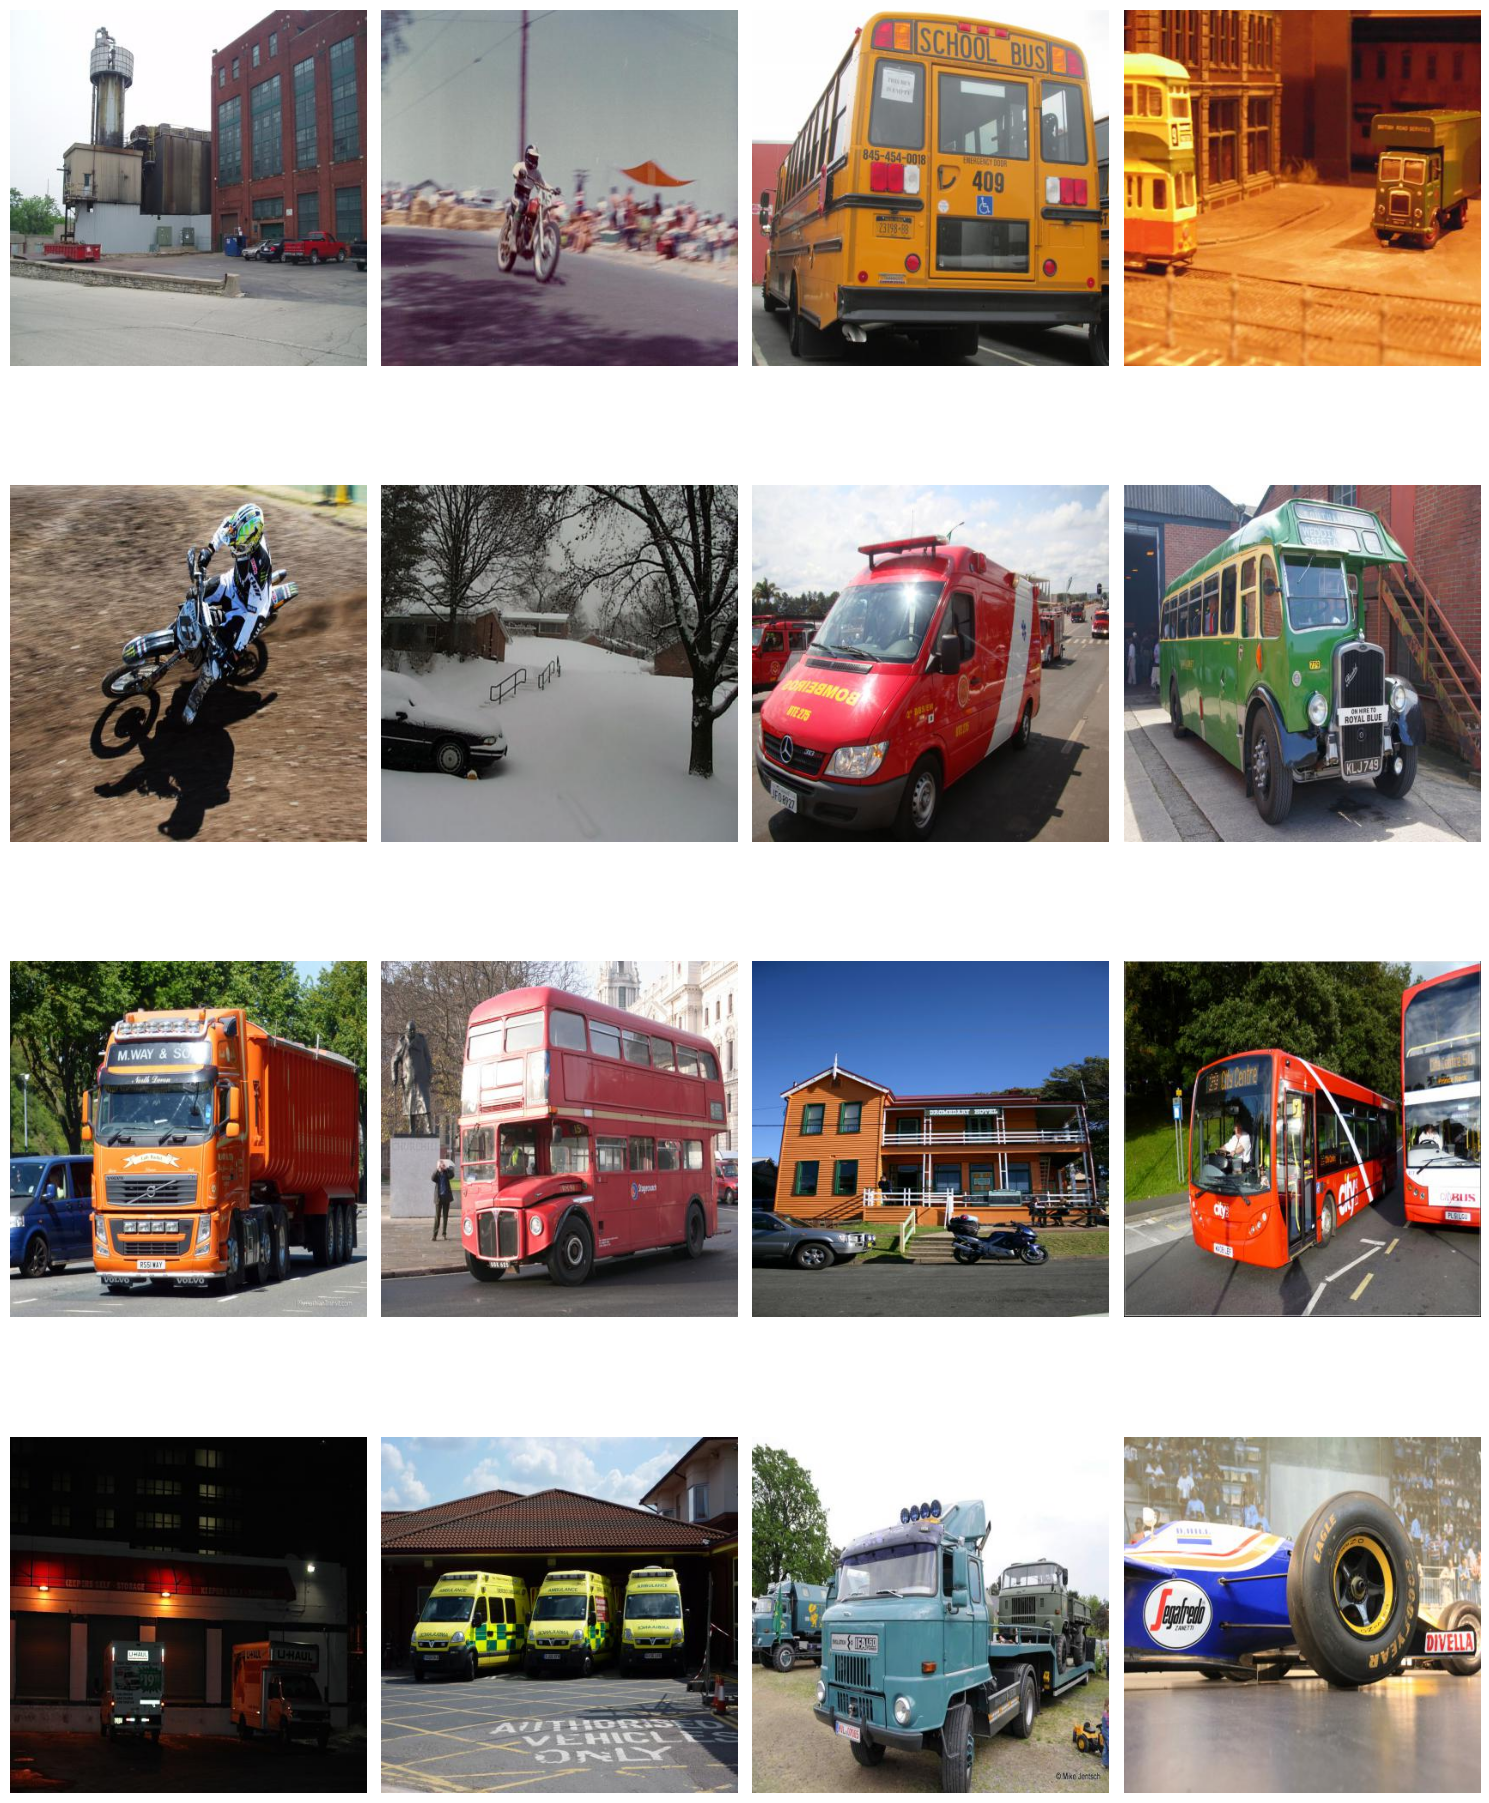

In [ ]:
  import os
  import cv2
  import matplotlib.pyplot as plt
  import random

  # Función para procesar imágenes (aquí debes definir tu propio procesamiento)
  def preprocess_image(img_path):
      image = cv2.imread(img_path)
      # Aquí puedes agregar tu lógica de preprocesamiento, por ejemplo, redimensionar
      return image

  # Función para realizar aumentaciones (define tus aumentaciones aquí)
  def augment_image(image):
      # Aquí puedes agregar la lógica para aumentar la imagen (por ejemplo, rotaciones, recortes, etc.)
      return image  # Devuelve la imagen aumentada

  # Función para mostrar imágenes
  def show_images(images, n_cols=4):
      n_rows = len(images) // n_cols + (len(images) % n_cols > 0)
      plt.figure(figsize=(15, 5 * n_rows))

      for i, (image, label) in enumerate(images):
          plt.subplot(n_rows, n_cols, i + 1)
          plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir BGR a RGB
          plt.axis('off')

      plt.tight_layout()
      plt.show()

  # Función para preparar el dataset y realizar aumentaciones
  def prepare_dataset(path):
      images_path = os.path.join(path, 'images')
      labels_path = os.path.join(path, 'labels')

      # Verificar que los directorios existen
      if not os.path.exists(images_path):
          print(f"El directorio de imágenes {images_path} no existe.")
          return []
      if not os.path.exists(labels_path):
          print(f"El directorio de etiquetas {labels_path} no existe.")
          return []

      images = []

      for img_file in os.listdir(images_path):
          img_path = os.path.join(images_path, img_file)
          lbl_path = os.path.join(labels_path, img_file.replace('.jpg', '.txt'))

          if os.path.exists(lbl_path):  # Verificar si el archivo de etiqueta existe
              image = preprocess_image(img_path)  # Procesamiento de imagen
              augmented_image = augment_image(image)  # Aumento de imagen

              with open(lbl_path, 'r') as file:
                  label_data = file.read().strip()

              # Añadir la imagen original y la aumentada junto con su etiqueta
              images.append((image, label_data))
              images.append((augmented_image, label_data))
          else:
              print(f"Etiqueta no encontrada para la imagen {img_file}")

      return images

  # Rutas a los sets de datos
  train_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/train'
  val_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/valid'

  # Preparar el conjunto de datos de entrenamiento y validación
  train_data = prepare_dataset(train_path)
  val_data = prepare_dataset(val_path)

  print(f"Imágenes de entrenamiento preparadas: {len(train_data)}")
  print(f"Imágenes de validación preparadas: {len(val_data)}")

  # Mostrar algunas imágenes de entrenamiento
  if train_data:
      show_images(random.sample(train_data, 16))  #
  else:
      print("No se encontraron imágenes de entrenamiento preparadas.")


**Verificar la arquitectura del modelo YOLOv8n que utiliza una combinación de capas convolucionales, capas de normalización y funciones de activación**

In [ ]:
from ultralytics import YOLO

#Cargar el modelo YOLOv8n y verificar su arquitectura
model_base = YOLO('yolov8n.pt')
print(model_base.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

# ENTRENAMIENTO

Implementamos el entrenamiento de nuestro modelo de detección de vehículos utilizando YOLOv8, una de las arquitecturas más eficientes en detección de objetos. En nuestro experimento, configuramos el modelo para entrenar durante 100 épocas con imágenes de 640x640 píxeles y un tamaño de lote de 16. Lo interesante fue que incluimos un mecanismo de parada earlyStopping con una paciencia de 6 épocas para optimizar el tiempo de entrenamiento. Los resultados fueron bastante prometedores: completamos el entrenamiento en apenas 0.123  horas, es decir, un total de 7 minutos con 28 segundos, ya que se hizo uso de T4-GPU, la T4-GPU se refiere a la NVIDIA Tesla T4, una unidad de procesamiento gráfico (GPU), y nuestro modelo mostró un rendimiento variado según la clase de vehículo. Particularmente destacable fue el desempeño en la detección de ambulancias, con una precisión (mAP50) del 87.2%, aunque notamos que el modelo tuvo más dificultades con camiones y motocicletas, alcanzando un mAP50 general de 60.7%. Estos resultados nos proporcionan una base sólida para futuras mejoras en nuestro sistema de detección de vehículos.


In [ ]:
from ultralytics import YOLO

yaml_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/dataset.yaml'

# Define la ruta donde quieres guardar los resultados
results_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados'
experiment_name = 'resultadosModelo'  # Nombre de tu experimento


# Inicializa y entrena el modelo de YOLOv8
model = YOLO('yolov8n.pt')
#Si la pérdida de validación no mejora durante 6 épocas consecutivas, el entrenamiento se detendrá automáticamente. (Early stopping o detección temprana)
model.train(data=yaml_path, epochs=100, imgsz=640, patience=6, batch=16, project=results_path, name=experiment_name)
#Una caída en el valor de cls_loss indica que el modelo está haciendo un mejor trabajo en la clasificación de los objetos.

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/dataset.yaml, epochs=100, time=None, patience=6, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados, name=resultadosModelo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=

100%|██████████| 755k/755k [00:00<00:00, 18.6MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<00:00, 1722.58it/s]

train: New cache created: /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning:

A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.

val: Scanning /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 894.17it/s]

val: New cache created: /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/valid/labels.cache


Plotting labels to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.27G      1.056      2.788      1.376         48        640: 100%|██████████| 55/55 [00:22<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        250        454      0.363      0.221      0.323      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.26G      1.143      2.205      1.419         59        640: 100%|██████████| 55/55 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.71it/s]

                   all        250        454       0.69      0.188      0.233      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.26G      1.176      2.144      1.449         47        640: 100%|██████████| 55/55 [00:18<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        250        454      0.433      0.389      0.372      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.27G      1.232      2.134      1.479         46        640: 100%|██████████| 55/55 [00:18<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.01it/s]

                   all        250        454      0.476       0.38      0.399      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.16G      1.219      2.037      1.475         43        640: 100%|██████████| 55/55 [00:18<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        250        454      0.345       0.32      0.268      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.16G      1.193       1.93      1.451         40        640: 100%|██████████| 55/55 [00:17<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        250        454      0.365      0.445      0.321      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.16G      1.164      1.822      1.422         60        640: 100%|██████████| 55/55 [00:17<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        250        454      0.393      0.471      0.407      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.26G      1.155      1.762      1.438         50        640: 100%|██████████| 55/55 [00:17<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        250        454       0.45      0.404      0.388      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.18G        1.1      1.663      1.401         41        640: 100%|██████████| 55/55 [00:17<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.13it/s]

                   all        250        454      0.625      0.388      0.424       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.16G       1.13      1.646      1.408         55        640: 100%|██████████| 55/55 [00:17<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.23it/s]

                   all        250        454      0.532      0.485      0.472      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.18G       1.12       1.62      1.395         54        640: 100%|██████████| 55/55 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]

                   all        250        454      0.439      0.436      0.417      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.26G      1.104      1.581      1.391         41        640: 100%|██████████| 55/55 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]

                   all        250        454      0.389      0.371      0.389      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.16G      1.089      1.521       1.37         53        640: 100%|██████████| 55/55 [00:16<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        250        454      0.296      0.457      0.281      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.17G      1.082      1.455      1.372         45        640: 100%|██████████| 55/55 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        250        454       0.65      0.506      0.547      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.14G      1.067      1.458      1.348         47        640: 100%|██████████| 55/55 [00:17<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        250        454      0.499      0.481       0.46      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.26G      1.038      1.398      1.328         48        640: 100%|██████████| 55/55 [00:17<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all        250        454      0.498      0.427      0.426      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.16G     0.9961      1.305      1.313         47        640: 100%|██████████| 55/55 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        250        454      0.545       0.44      0.449      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.18G      1.025      1.332      1.329         54        640: 100%|██████████| 55/55 [00:17<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        250        454      0.534       0.48      0.486       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.16G     0.9841      1.298      1.302         60        640: 100%|██████████| 55/55 [00:17<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        250        454      0.459      0.487      0.436      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.24G     0.9852      1.255      1.288         56        640: 100%|██████████| 55/55 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]


                   all        250        454       0.63      0.438      0.482      0.332
EarlyStopping: Training stopped early as no improvement observed in last 6 epochs. Best results observed at epoch 14, best model saved as best.pt.
To update EarlyStopping(patience=6) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

20 epochs completed in 0.123 hours.
Optimizer stripped from /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo/weights/last.pt, 6.2MB
Optimizer stripped from /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo/weights/best.pt, 6.2MB

Validating /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]


                   all        250        454      0.649      0.506      0.547      0.346
             Ambulance         50         64      0.758      0.812      0.767      0.559
                   Bus         30         46      0.625      0.609      0.553      0.341
                   Car         90        238      0.477      0.454      0.374      0.231
            Motorcycle         42         46      0.728      0.522      0.614      0.323
                 Truck         38         60      0.657      0.133      0.426      0.277
Speed: 0.5ms preprocess, 3.0ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7edf1bc909d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

Importacion de dataseet y visualizacion de el contenido de dataset

In [ ]:
import os

# Directorio del dataset
dataset_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset"

# Listar el contenido del directorio
contenido = os.listdir(dataset_path)
print(contenido)


['valid', 'test', 'dataset.yaml', 'resultados', 'train']


# EVALUAR MODELO

En este punto evaluamos el modelo; deacuerdo al entrenamiento que se tuvo para medir el rendimiento y el nivel de precision en la identificacion de imagenes.


In [ ]:
# Evaluar el modelo en imágenes de prueba
results = model.val(data=yaml_path)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.86it/s]


                   all        250        454      0.636      0.507      0.547      0.347
             Ambulance         50         64      0.757      0.812      0.763      0.557
                   Bus         30         46      0.624      0.609      0.553      0.345
                   Car         90        238      0.476      0.454      0.378      0.231
            Motorcycle         42         46      0.668      0.526      0.614      0.323
                 Truck         38         60      0.654      0.133      0.427      0.278
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo2


# VISUALIZACIÓN DE IMÁGENES


En este apartado podemos visualizar las imagenes a las cuales se les aplico la identificacion del tipo de vehiculo, donde podemos evidenciar un gran nivel de efectividad en la clasificacion de imagenes, las cuales dentro del patron y el mecanismo de verificacion cumplen 9

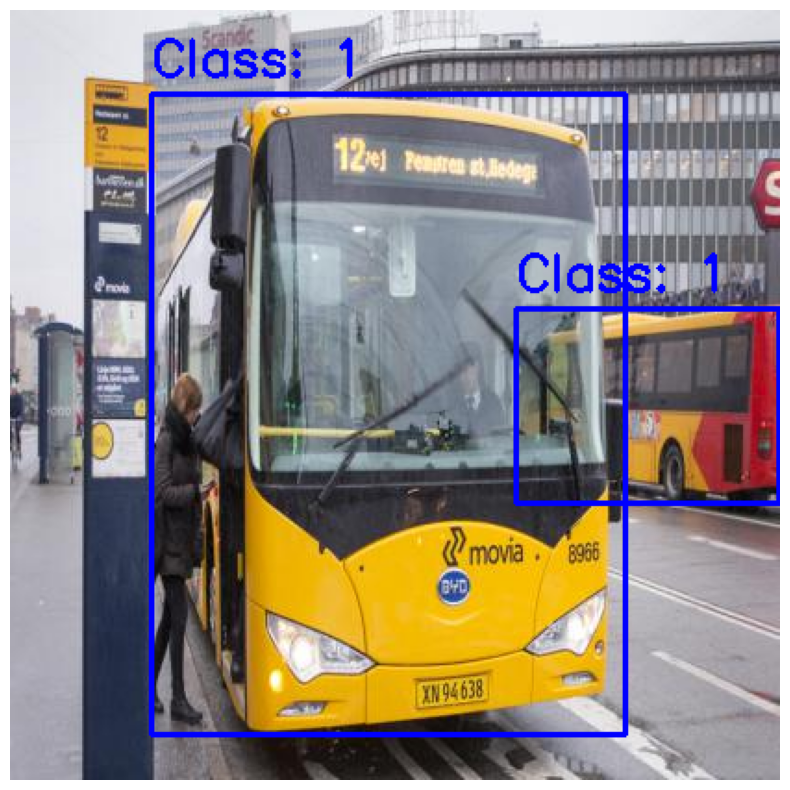

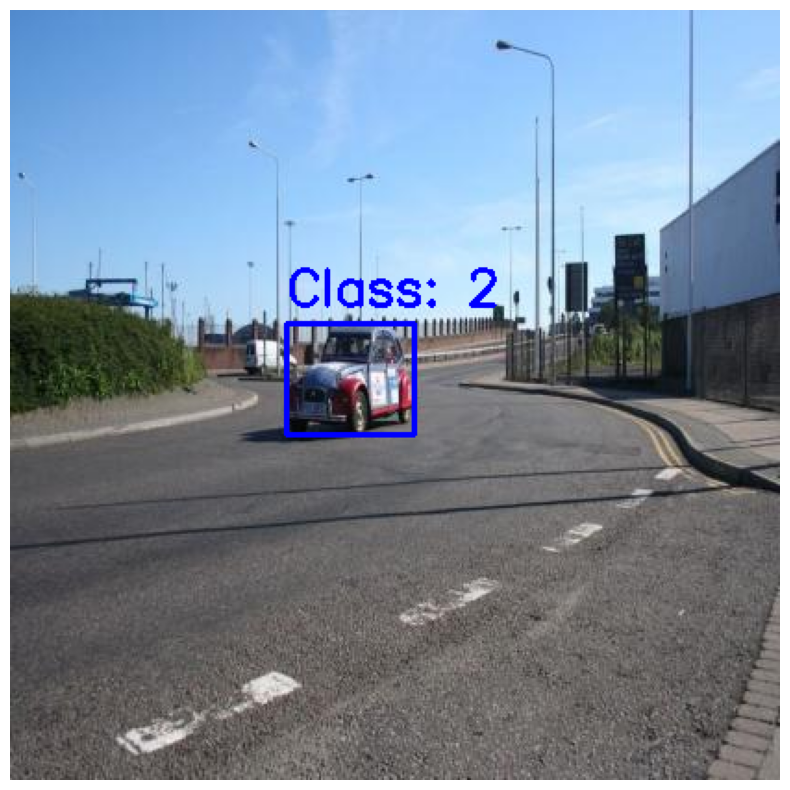

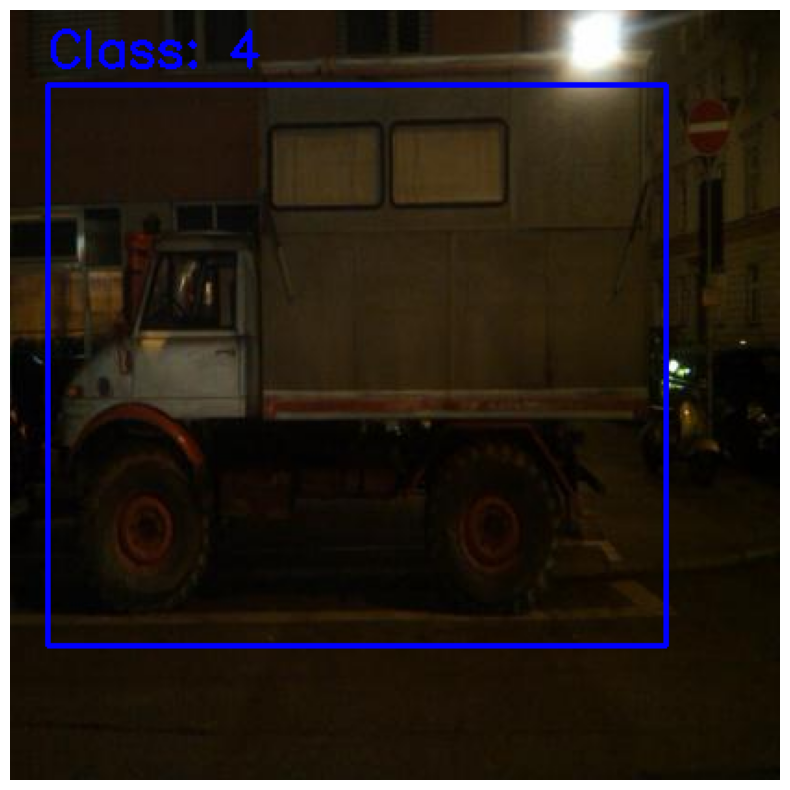

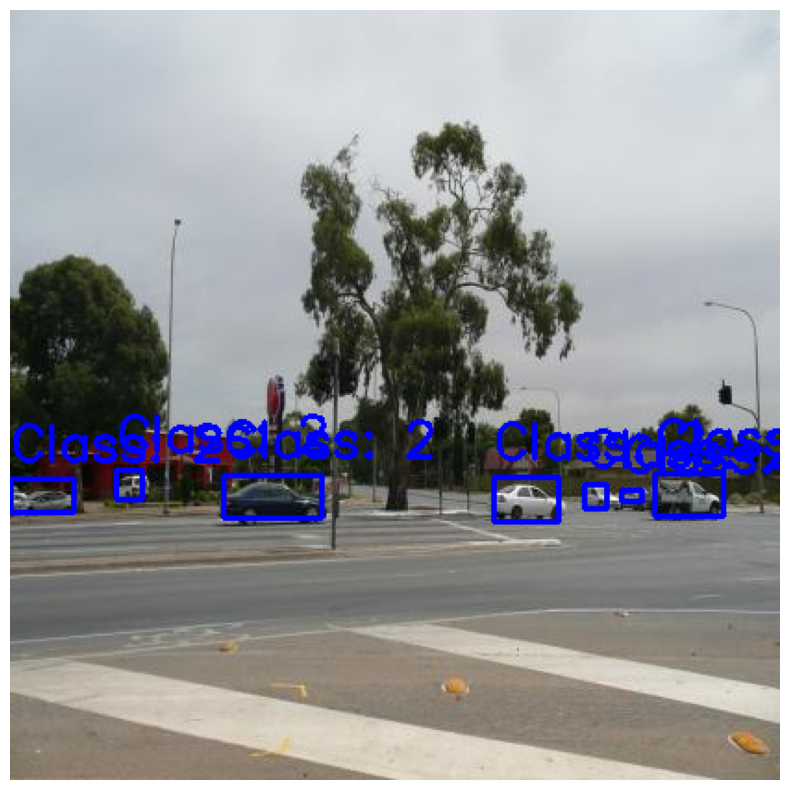

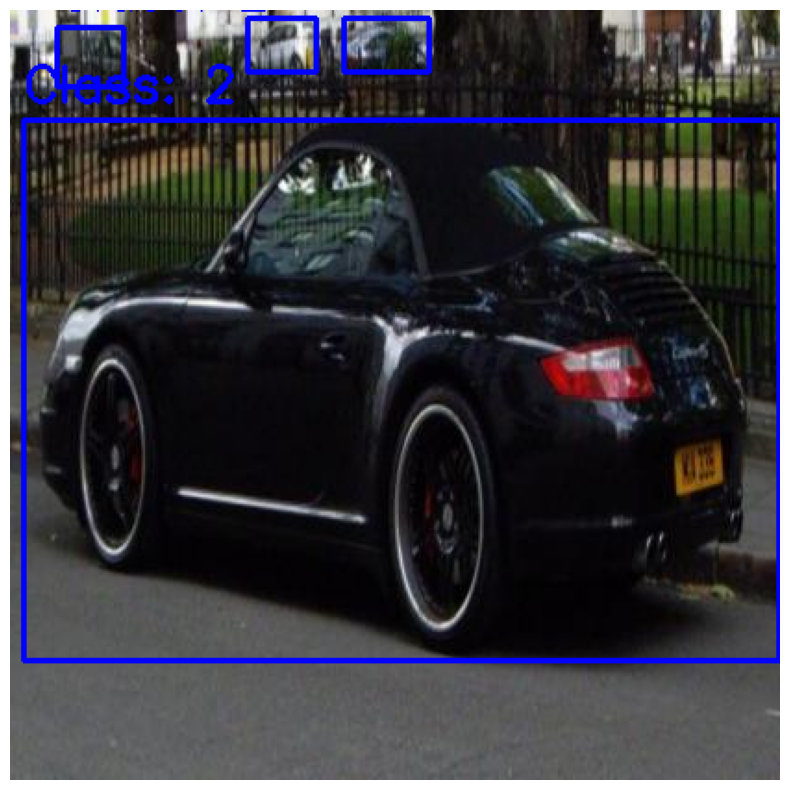

In [ ]:
test_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test'


def display_image_with_boxes(image_path, labels_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    with open(labels_path, 'r') as file:
        labels = file.readlines()

    for label in labels:
        class_id, x_center, y_center, w, h = map(float, label.split())
        x1 = int((x_center - w / 2) * width)
        x2 = int((x_center + w / 2) * width)
        y1 = int((y_center - h / 2) * height)
        y2 = int((y_center + h / 2) * height)

        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, f'Class: {int(class_id)}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

sample_images = [os.path.join(test_path, 'images', f) for f in os.listdir(os.path.join(test_path, 'images'))[:5]]
sample_labels = [os.path.join(test_path, 'labels', f.replace('.jpg', '.txt')) for f in os.listdir(os.path.join(test_path, 'images'))[:5]]

for img_path, lbl_path in zip(sample_images, sample_labels):
    display_image_with_boxes(img_path, lbl_path)




EVALUAR MODELO

En este apartado se evalua el modelo deacuerdo a las metricas establecidad anteriormente para el dataset de imagenes.



El modelo de detección de vehículos tiene un valor de rendimiento moderado el cual es  de 0.3667081093363352.Las métricas clave muestran que el modelo tiene una precisión razonable (0.636) pero un recall más bajo (0.507). Esto nos indicaria  que el modelo tiene dificultades para detectar todos los vehículos presentes en las imágenes, pero en cierta medida podemos dar patente de que la mayoria de iamgenes son auntiguas pero aun asi cuando identifica , suele ser correcta la precision en su gran mayoria.

El mAP50 de 0.547 indica que el modelo tiene una buena capacidad para detectar vehículos con un umbral del 50% de IoU (Intersección sobre Unión). Sin embargo, el mAP50-95 de 0.347 muestra que el rendimiento se degrada a umbrales de IoU más altos.

El modelo es capaz de detectar los 5 tipos de vehículos en las imágenes: ambulancias, autobuses, coches, motocicletas y camiones en menor cantidad.En términos de velocidad, el modelo tarda 0.44 segundos en preprocesar las imágenes, 5.03 segundos en realizar la inferencia, 0.0014 segundos en calcular la pérdida, y 3.91 segundos en realizar el postprocesado.Generalmente, estos resultados indican que el modelo tiene un rendimiento moderado, con margen de mejora en cuanto a la capacidad de detección de todos los vehículos presentes.

In [ ]:
metrics = model.val()

# Imprime las métricas
print(metrics)

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]


                   all        250        454      0.636      0.507      0.547      0.347
             Ambulance         50         64      0.757      0.812      0.763      0.557
                   Bus         30         46      0.624      0.609      0.553      0.345
                   Car         90        238      0.476      0.454      0.378      0.231
            Motorcycle         42         46      0.668      0.526      0.614      0.323
                 Truck         38         60      0.654      0.133      0.427      0.278
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7edf26420e20>
curves:

El modelo de detección de vehículos realiza predicciones eficientes en un conjunto de imágenes de prueba "/VehiclesDetetctionDataset/Test/Images", detectando con precisión diferentes tipos de vehículos como autobuses y automóviles. El tiempo de procesamiento por imagen es  rápido, con tiempos de preprocesamiento, inferencia y postprocesamiento que oscilan entre 2-4 ms, 7-8 ms y 1-2 ms respectivamente.

In [ ]:
for img_path in sample_images:
    results = model.predict(source=img_path, save=True, save_txt=True)


image 1/1 /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images/47b09b34e24b4039_jpg.rf.9274b35afd28c89ed4221e69e765e71d.jpg: 640x640 2 Buss, 7.5ms
Speed: 2.4ms preprocess, 7.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo4
1 label saved to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo4/labels

image 1/1 /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images/7baf801decfab71a_jpg.rf.1atdX9M2VU1J7hd8ePoy.jpg: 640x640 1 Bus, 1 Car, 7.5ms
Speed: 4.4ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDa

# VIDEO PRUEBA


EN ESTE PUNTO AGREGAMOS UN VIDEO EN EL CUAL EL MODELO YA ENTRENADO DETERMINARA Y CLASIFICARA LOS ELEMENTOS CORRESPONDIENTES DENTRO DE ESTE LOS CUALES EN SU MAYORIA SON DEL TIPO DE LAS CLASES DEL MODELO. EL PROCESO ES  utilizando el modelo YOLO para detectar y resaltar los vehículos presentes en cada frame. Primero, se monta la unidad de Google Drive para acceder a los archivos. Luego, la función process_video abre el video, itera sobre cada frame, utiliza el modelo YOLO para detectar los vehículos, dibuja cajas delimitadoras y etiquetas alrededor de los objetos detectados, y finalmente escribe los frames procesados en un nuevo archivo de video, que se guarda en la unidad  de origen ; osea de Google Drive.

In [ ]:
import cv2
import os
from google.colab import drive
from IPython.display import Video
from ultralytics import YOLO

#Conexión entre Colab y tu Google Drive
drive.mount('/content/drive')

# Ruta del video original en Google Drive
video_path = '/content/drive/MyDrive/InteligenciaArtificial20242_Santiago Garcia-Juan Londoño-Didier Ortega-Natalia Londoño/VehiclesDetectionDataset/traffic.mp4'
# Ruta para guardar el video procesado
output_path = '/content/drive/MyDrive/InteligenciaArtificial20242_Santiago Garcia-Juan Londoño-Didier Ortega-Natalia Londoño/VehiclesDetectionDataset/traffic_detected.mp4'


def process_video(video_path, model, output_path):
    # Abrir el archivo de video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: No se puede abrir el archivo de video.")
        return

    # Configurar el archivo de salida
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 20.0, (width, height))

    # Procesar cada frame del video
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Obtener resultados del modelo YOLO
        results = model.predict(source=frame, save=False)

        # Dibujar cajas y etiquetas para cada objeto detectado
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            class_id = int(box.cls)
            confidence = float(box.conf)
            label = f"{model.names[class_id]} ({confidence:.2f})"

            # Dibujar la caja delimitadora
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

            # Dibujar la etiqueta de clase
            label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
            top_left = (x1, y1 - label_size[1] - 10)
            bottom_right = (x1 + label_size[0], y1)
            cv2.rectangle(frame, top_left, bottom_right, (255, 0, 0), -1)  # Fondo de la etiqueta
            cv2.putText(frame, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

        # Escribir el frame en el archivo de salida
        out.write(frame)

    # Liberar recursos
    cap.release()
    out.release()
    print(f"Processed video saved at: {output_path}")

# Procesar el video
process_video(video_path, model, output_path)


Se han truncado las últimas 5000 líneas del flujo de salida.
Speed: 4.6ms preprocess, 11.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 1 Motorcycle, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 Cars, 1 Motorcycle, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 Cars, 1 Motorcycle, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 1 Motorcycle, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 Cars, 1 Motorcycle, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Cars, 1 Motorcycle, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 

# MATRIZ DE CONFUSIÓN


DENTRO DE LA VERIFICACION DE LA MATRIZ DE CONFUSION NOS REFLEJA UN BAJO NIVEL DE PERDIDA DE PRECISION YA QUE EL MODELO TIENE MEJOR PRECISION EN LA IDETNFICACION DE CARROS, AUN ASI PESE A QUE NO VERIFICA DE LA MEJOR MANERA LOS CAMIONES PORQUE DEBIODO A LA CANTIDAD DE IMAGENES EL MODELO NO SIGUE APRENDIENDO Y  LA INCIDENCIA EN EL CUMPLIMIENTO DE LAS DEMAS CLASES SIGUE SIENDO CORRECTA Y EN UNA ALTA PRECISION

ADEMAS; La matriz de confusión muestra el rendimiento del modelo de detección de vehículos en el conjunto de datos de prueba /Test/Images/ . El modelo fue entrenado para detectar 5 clases de vehículos: Ambulancia, Bus, Coche, Motocicleta y Camión e indentifcamos el siguiente comportamiento:


El modelo tiene un desempeño sólido en la clasificación de Ambulancias, con 18 detecciones correctas.
Para la clase Bus, el modelo muestra una confusión significativa, con 18 detecciones correctas pero también 2 clasificaciones incorrectas como Coche.
En la clase Coche, el modelo tiene un rendimiento excelente, con 74 detecciones correctas y ninguna clasificación errónea.
Para Motocicletas, el modelo identifica correctamente 2 instancias.
En la clase Camión, el modelo tiene un  desempeño menor , con 2 detecciones para ambulancia, buses y choques  y ninguna clasificación correcta para bus.Osea que como recomendacion seria bueno recargar el dataset de test con mas imagenes de buses para realizar un mejor aprendizaje.

En general, el modelo tiene un rendimiento sólido en la clasificación de Coches, Motocicletas, Buses y Ambulancias, pero muestra dificultades para diferenciar entre Camiones  y otras clases como coches,ambulancia y buses.Pero generamente identifica la mayoria de clases con alta precision.
                                                                                          


image 1/1 /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images/47b09b34e24b4039_jpg.rf.9274b35afd28c89ed4221e69e765e71d.jpg: 640x640 2 Buss, 12.1ms
Speed: 4.3ms preprocess, 12.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images/7baf801decfab71a_jpg.rf.1atdX9M2VU1J7hd8ePoy.jpg: 640x640 1 Car, 9.3ms
Speed: 3.3ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images/6d5d24e86c1ff260_jpg.rf.f7acfa6e4c8049353976699fcd4d515f.jpg: 640x640 1 Bus, 17.0ms
Speed: 3.3ms preprocess, 17.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDatase

<Figure size 1500x1500 with 0 Axes>

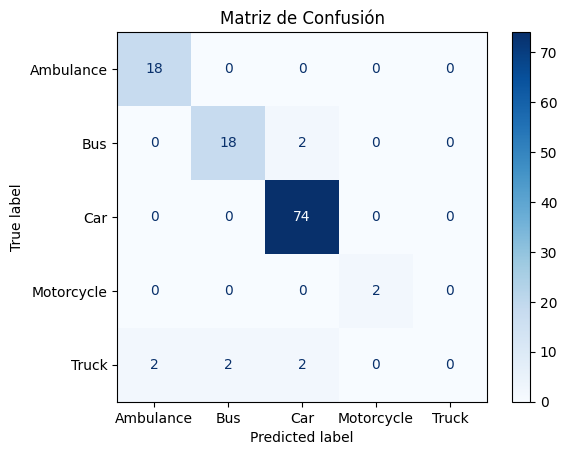

Número total de etiquetas verdaderas: 120
Número total de etiquetas predichas: 120
Número total de imágenes procesadas: 126


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

yaml_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/dataset.yaml'
test_images_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images"
test_labels_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/labels"

# Cargar nombres de las clases desde el archivo YAML
with open(yaml_path) as file:
    dataset_info = yaml.safe_load(file)
class_names = dataset_info['names']

# Función para obtener las etiquetas verdaderas desde el archivo de anotación
def get_true_labels(img_path):
    label_path = os.path.join(test_labels_path, os.path.splitext(os.path.basename(img_path))[0] + ".txt")
    true_labels = []  # Lista para almacenar las etiquetas verdaderas de cada imagen.

    if os.path.exists(label_path):
        with open(label_path, 'r') as file:
            for line in file:
                true_class_id = int(line.split()[0])  # Extrae la clase (entero) de cada línea en el archivo de anotación.
                true_labels.append(true_class_id)
    return true_labels  # Retorna la lista de etiquetas verdaderas para esa imagen.

# Listas para almacenar todas las etiquetas verdaderas y las etiquetas predichas
true_labels = []
pred_labels = []

# Iterar sobre cada imagen en el conjunto de prueba
for img in os.listdir(test_images_path):
    img_path = os.path.join(test_images_path, img)
    results = model.predict(source=img_path, conf=0.6)  # Realizar la predicción con un umbral de confianza del 25%

    # Obtener las etiquetas verdaderas de la imagen
    true_label = get_true_labels(img_path)

    # Solo proceder si existen etiquetas verdaderas para la imagen
    if true_label:
        # Obtener las etiquetas predichas para la imagen
        pred_label = [int(box.cls) for box in results[0].boxes]  # Lista de etiquetas predichas de los objetos detectados.

        # Asegurar que true_labels y pred_labels tengan la misma longitud
        # Tomar la longitud mínima y truncar ambas listas si es necesario.
        min_len = min(len(true_label), len(pred_label))
        true_labels.extend(true_label[:min_len])
        pred_labels.extend(pred_label[:min_len])

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(true_labels, pred_labels, labels=range(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(15, 15))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

# Imprimir el número total de etiquetas e imágenes
print("Número total de etiquetas verdaderas:", len(true_labels))
print("Número total de etiquetas predichas:", len(pred_labels))
print("Número total de imágenes procesadas:", len(os.listdir(test_images_path)))

# GRÁFICA FUNCIÓN DE PÉRDIDA





```
# Tiene formato de código
```

EN ESTE PUNTO  AL EJECUTAR EL ENTRENAMIENTO COMO TAL; PODEMOS DARNOS CUENTA QUE EL MODELO MEJORA CONFORME VAN AUMENTANDO LAS EPOCAS Y ASI MISMO; LA PERDIDA DE CLASIFICACION ES MENOR; YA QUE CONSIDERANDO EL FACTOR DE LA MATRIZ DE CONFUSION EN EL MARGEN DE CLASIFICACION DE CARROS; ESTE MODELO ES MEJOR EN ESE ASPECTO Y QUE ESTA CARACTERISTICA ( PERIDA DE CLASIFICACON DISMUYA ES UN EJEMPLO CLARO DE ESO).

Pérdida de clasificación: 2.78821
Pérdida de clasificación: 2.205
Pérdida de clasificación: 2.14359
Pérdida de clasificación: 2.13389
Pérdida de clasificación: 2.03673
Pérdida de clasificación: 1.9296
Pérdida de clasificación: 1.82175
Pérdida de clasificación: 1.76221
Pérdida de clasificación: 1.66294
Pérdida de clasificación: 1.64622
Pérdida de clasificación: 1.62003
Pérdida de clasificación: 1.58057
Pérdida de clasificación: 1.52077
Pérdida de clasificación: 1.45541
Pérdida de clasificación: 1.45788
Pérdida de clasificación: 1.39789
Pérdida de clasificación: 1.30537
Pérdida de clasificación: 1.33185
Pérdida de clasificación: 1.29816
Pérdida de clasificación: 1.25505



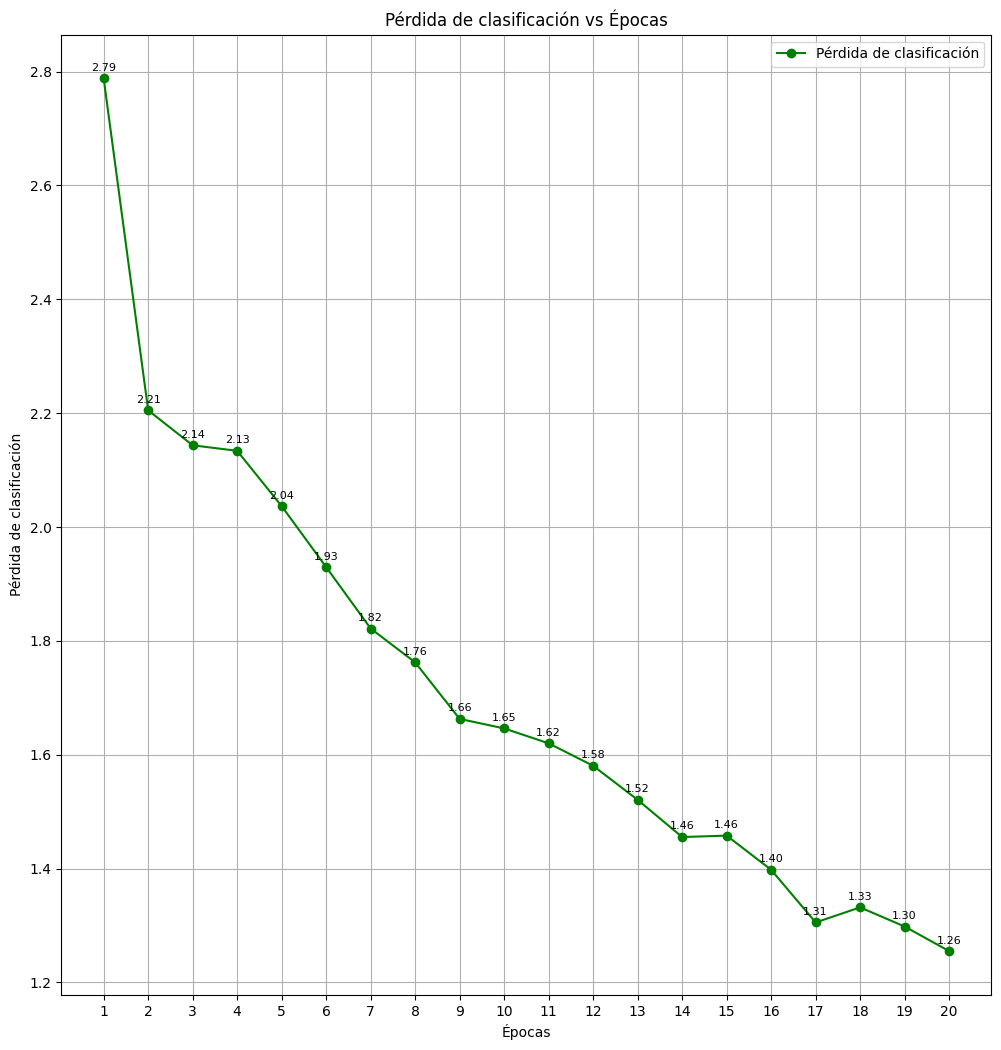

In [ ]:
from math import e
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define la ruta a tu archivo de resultados
dataset_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo/results.csv"
# Carga los resultados del entrenamiento desde el archivo CSV
results = pd.read_csv(dataset_path)

# Extraer las columnas necesarias
cls_loss = results['train/cls_loss']
resultsP = results['metrics/precision(B)']  # Precisión es la medida de la exactitud en las predicciones
epochs = results['epoch']

# Definir las métricas
metrics = {
    "Pérdida de clasificación": cls_loss,
}

# Imprimir las métricas
for metric_name, values in metrics.items():
    for value in values:
        print(f"{metric_name}: {value}")
    print()  # Salto de línea después de cada métrica

# Gráfica de pérdida
plt.figure(figsize=(12, 12))  # Ajusta el tamaño de la figura según tus necesidades
plt.plot(epochs, cls_loss, label='Pérdida de clasificación', color='green', marker='o')

# Agregar los valores numéricos encima de cada punto
for i, value in enumerate(cls_loss):
    plt.text(epochs[i], value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Configuración de la gráfica
plt.title('Pérdida de clasificación vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida de clasificación')
plt.xticks(epochs)  # Asegura que las etiquetas del eje x sean los números de las épocas
plt.legend()
plt.grid(True)

# Ajustar los márgenes para que haya más espacio para los números
plt.subplots_adjust(top=0.9, bottom=0.1)

plt.show()


# GRÁFICA DE ACCURACY


En este punto se realiza un análisis y visualización de los resultados del entrenamiento del  modelo de detección de vehículos.  comenzamos  cargando un archivo CSV de resultados ubicado en una ruta específica del dataset de Kaggle; y  extraemos  específicamente las columnas de pérdida de clasificación (cls_loss), precisión (metrics/precision(B)) y épocas, para poder usar la métrica de precisión (accuracy) para la visualización. creamos tambien  una gráfica de línea que muestra la evolución de la precisión del modelo a lo largo de 20 épocas de entrenamiento, donde se puede observar que la precisión fluctúa significativamente, alcanzando picos de 0.69 (época 2), 0.65 (época 14) y 0.63 (época 20), con algunos valles notables como 0.30 (época 13) y 0.35 (época 5).


Tendencia general: La precisión del modelo presenta un comportamiento oscilante a lo largo de las épocas, con altibajos significativos. En general, muestra una tendencia ascendente, pero con cambios abruptos en algunos puntos.
Valores máximos y mínimos: El modelo alcanza su mejor precisión de 0.69 en la época 2, lo cual representa un buen resultado. Sin embargo, también hay momentos en los que la precisión cae hasta valores tan bajos como 0.35, lo que indica una inestabilidad en el rendimiento.
Patrones repetitivos: Se pueden identificar algunos patrones repetitivos en el comportamiento de la precisión, donde se observan picos y valles a intervalos regulares. Esto sugiere que el proceso de entrenamiento puede tener problemas de convergencia o estar siendo afectado por factores que varían periódicamente.
Fluctuaciones bruscas: Entre las épocas 10 y 15, se observan cambios muy bruscos en la precisión, pasando de 0.65 a 0.30 y volviendo a subir a 0.55. Estas fluctuaciones tan pronunciadas indican que el modelo puede estar teniendo dificultades para estabilizarse y converger a una solución óptima.

Accuracy: 0.36264
Accuracy: 0.6895
Accuracy: 0.43327
Accuracy: 0.47596
Accuracy: 0.34535
Accuracy: 0.36546
Accuracy: 0.39266
Accuracy: 0.45044
Accuracy: 0.62522
Accuracy: 0.53171
Accuracy: 0.43863
Accuracy: 0.3895
Accuracy: 0.29612
Accuracy: 0.65001
Accuracy: 0.49873
Accuracy: 0.49816
Accuracy: 0.54516
Accuracy: 0.53387
Accuracy: 0.45948
Accuracy: 0.62981



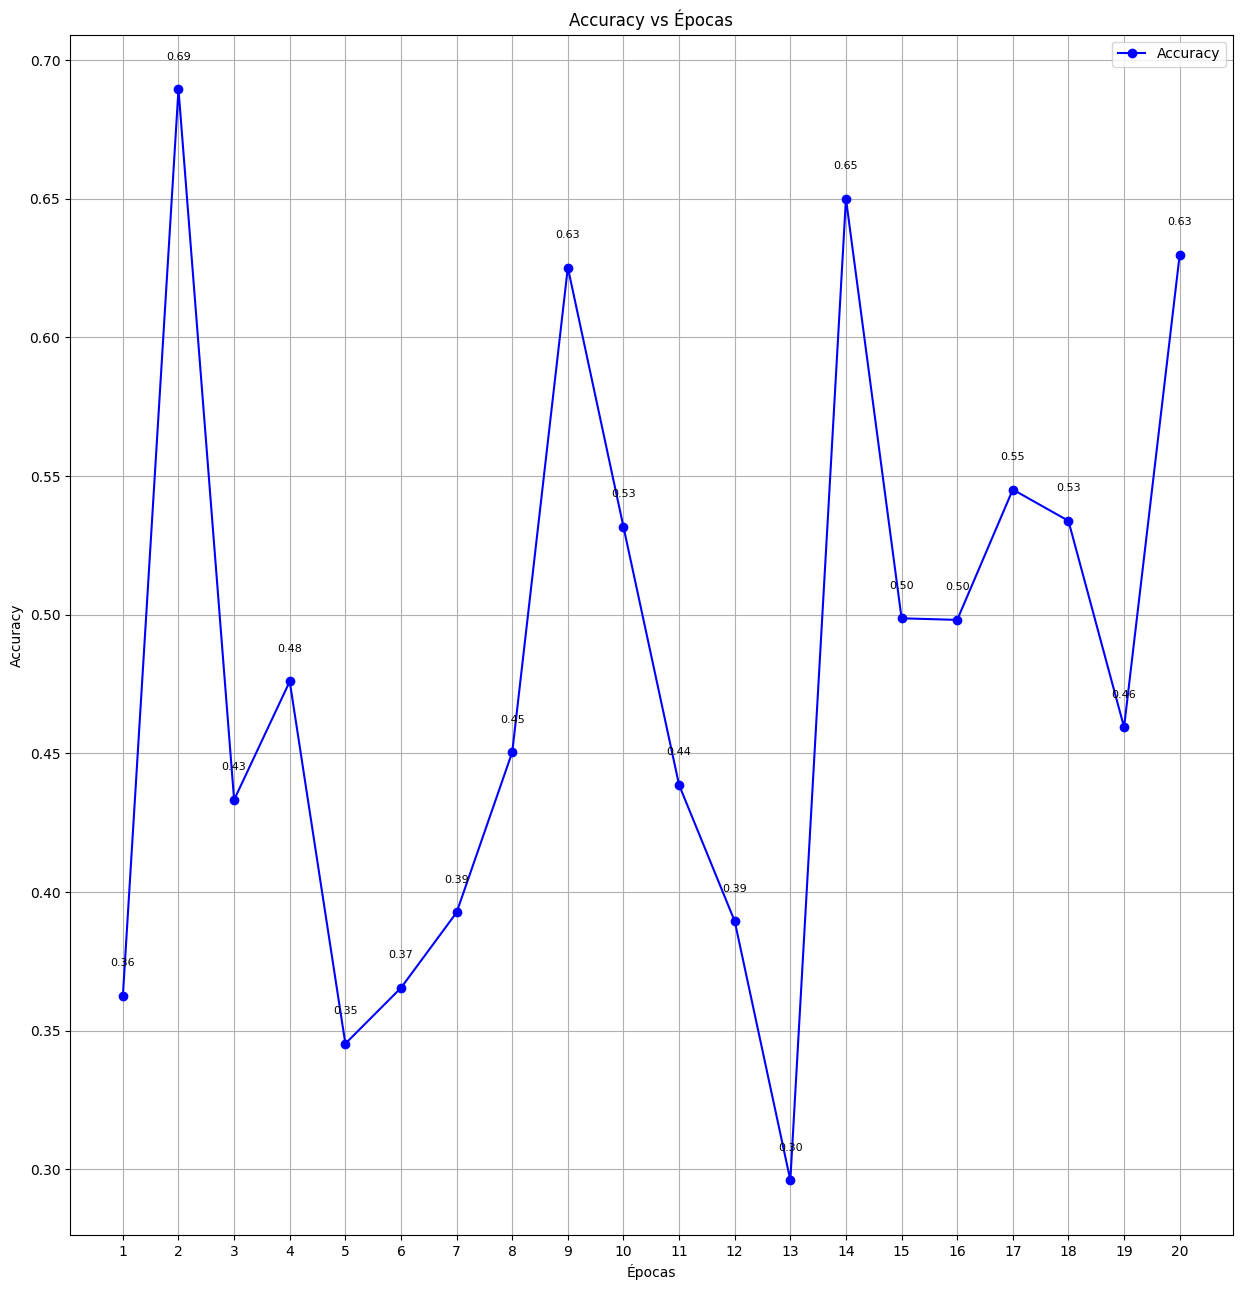

In [ ]:
from math import e
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define la ruta a tu archivo de resultados
dataset_path = "/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosModelo/results.csv"
# Carga los resultados del entrenamiento desde el archivo CSV
results = pd.read_csv(dataset_path)

# Extraer las columnas necesarias
cls_loss = results['train/cls_loss']
resultsP = results['metrics/precision(B)']  # Precisión es la medida de la exactitud en las predicciones
epochs = results['epoch']

# Definir las métricas
metrics = {
    #"Épocas": epochs,
    "Accuracy": resultsP
}

# Imprimir las métricas
for metric_name, values in metrics.items():
    for value in values:
        print(f"{metric_name}: {value}")
    print()  # Salto de línea después de cada métrica

# Gráfica de precisión
plt.figure(figsize=(15, 15))  # Ajusta el tamaño de la figura según tus necesidades
plt.plot(epochs, resultsP, label='Accuracy', color='blue', marker='o')

# Agregar los valores numéricos encima de cada punto
for i, value in enumerate(resultsP):
    plt.text(epochs[i], value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=8, color='black')

# Configuración de la gráfica
plt.title('Accuracy vs Épocas')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Asegura que las etiquetas del eje x sean los números de las épocas
plt.legend()
plt.grid(True)

# Ajustar los márgenes para que haya más espacio para los números
plt.subplots_adjust(top=0.9, bottom=0.1)

plt.show()


#PREDICCIÓN CON EL TEST


In [ ]:
# Ejecutar predicción y guardar los resultados
# Define la ruta donde quieres guardar los resultados
resultsP_path = '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados'
experimentP_name = 'resultadosPrediccion'  # Nombre de tu experimento

results = model.predict(source='/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images', project=resultsP_path, name=experimentP_name, save=True)

# Verificar la estructura de los resultados
print(type(results))  # Mostrar el tipo de `results`
print(results)        # Imprimir `results` para ver su contenido

# Si `results` es una lista de objetos Result
for result in results:
    # Acceder a las cajas, clases y confidencias de cada resultado
    boxes = result.boxes  # Obtenemos las cajas delimitadoras
    for box in boxes:
        class_id = int(box.cls)          # ID de la clase
        confidence = float(box.conf)     # Confianza de la predicción
        bbox = box.xyxy.tolist()[0]      # Coordenadas del cuadro

        print(f"Clase: {class_id}, Confianza: {confidence:.2f}, Cuadro: {bbox}")

Se han truncado las últimas 5000 líneas del flujo de salida.
        [ 91,  92,  96]],

       [[100, 101,  99],
        [ 94,  95,  93],
        [ 96,  97,  95],
        ...,
        [ 86,  88,  89],
        [ 85,  86,  90],
        [ 91,  92,  96]]], dtype=uint8)
orig_shape: (416, 416)
path: '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/test/images/6dce4caa5b30c32a_jpg.rf.ptCAjjugxBjYRY2Pe2IP.jpg'
probs: None
save_dir: '/root/.cache/kagglehub/datasets/alkanerturan/vehicledetection/versions/3/VehiclesDetectionDataset/resultados/resultadosPrediccion'
speed: {'preprocess': 2.4225711822509766, 'inference': 7.403373718261719, 'postprocess': 1.373291015625}, ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Ambulance', 1: 'Bus', 2: 'Car', 3: 'Motorcycle', 4: 'Truck'}
obb: None
orig_img: array([[[ 96, 107,  99],
        [ 83,  94,  86],
      